<a href="https://colab.research.google.com/github/sw98cs/ChallengeTelecomXpt1/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividades a realizar en esta primera etapa:

  1. Importar los datos
  2. Comprender que informacion contiene el dataset
  3. Verificar las inconsistencias
  4. Corregir las inconsistencias
  5. Traducir las columnas y/o los datos
  6. Crear una columna de cargos diarios


#📌 Extracción

In [40]:
import requests

import pandas as pd

In [41]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

respuesta = requests.get(url)
datos = respuesta.json()

df = pd.DataFrame(datos)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [42]:
df = pd.json_normalize(datos)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

**Verificacion**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

2. Verificiacion de valores unicos

In [44]:
for columna in df.columns:
  print(f"Valores unicos en la columna'{columna}: {df[columna].nunique()}'")
  if df[columna].nunique() < 50:
    print(df[columna].unique())
  print('-' * 50)

Valores unicos en la columna'customerID: 7267'
--------------------------------------------------
Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.tenure: 73'
--------------------------------------------------
Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------

3. Valores duplicados

In [45]:
print(f"Valores duplicados: {df.duplicated().sum()}")

Valores duplicados: 0


4. Valores nulos

In [46]:
print(f"Valores nulos: {df.isnull().sum()}")

Valores nulos: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


5. Valores vacios o en blanco

In [47]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


**Transformacion**

1. Cambiando la columna accont.Charges.Total para float

In [48]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [50]:
print(f"Valores nulos: {df.isnull().sum()}")

Valores nulos: customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


2. Eliminacion de valores vacios en la columna Churn

In [51]:
df = df[df['Churn'].str.strip() != '']
print('Numero de filas despues de eliminar valores vacios en Churn:', len(df))

Numero de filas despues de eliminar valores vacios en Churn: 7043


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [53]:
for columna in df.columns:
  print(f"Valores unicos en la columna'{columna}: {df[columna].nunique()}'")
  if df[columna].nunique() < 50:
    print(df[columna].unique())
  print('-' * 50)

Valores unicos en la columna'customerID: 7043'
--------------------------------------------------
Valores unicos en la columna'Churn: 2'
['No' 'Yes']
--------------------------------------------------
Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.tenure: 73'
--------------------------------------------------
Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
-----------------------------------

In [54]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [55]:
df = df.dropna(subset=['account.Charges.Total'])

In [56]:
print(f"Valores nulos: {df.isnull().sum()}")

Valores nulos: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


## Columna de cuentas diarias (opcional)

In [57]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [58]:
df['Cuentas_diarias'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [59]:
columnas = {
    'customerID': 'Id',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'Tiene_pareja',
    'customer.Dependents': 'Tiene_dependientes',
    'customer.tenure': 'Tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'Tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivos',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'facturacion_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'Valor_mensual',
    'account.Charges.Total': 'Total_cobrado'
}
df = df.rename(columns=columnas)
df

,Id,Churn,Genero,tiene +60,Tiene_pareja,Tiene_dependientes,Tiempo_contrato,servicio_telefono,multiples_lineas,Tipo_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_digital,metodo_pago,Valor_mensual,Total_cobrado,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [60]:
df['Churn'] = df['Churn'].replace({'No': 'No', 'Yes': 'Si'})
df['Genero'] = df['Genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['tiene +60'] = df['tiene +60'].replace({'No': 'No', 'Yes': 'Si'})
df['Tiene_pareja'] = df['Tiene_pareja'].replace({'No': 'No', 'Yes': 'Si'})
df['Tiene_dependientes'] = df['Tiene_dependientes'].replace({'No': 'No', 'Yes': 'Si'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'No': 'No', 'Yes': 'Si'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No': 'No', 'Yes': 'Si', 'No phone service': 'Sin servicio de telefono'})
df['Tipo_internet'] = df['Tipo_internet'].replace({'No': 'No', 'Yes': 'Si', 'Fiber optic': 'Fibra optica'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'Month-to-month': 'Mensual', 'One year': 'Anual', 'Two year': 'Dos años'})
df['metodo_pago'] = df['metodo_pago'].replace({'Electronic check': 'Cheque electronico', 'Mailed check': 'Cheque', 'Bank transfer (automatic)': 'Transferencia bancaria', 'Credit card (automatic)': 'Tarjeta de credito'})
df


,Id,Churn,Genero,tiene +60,Tiene_pareja,Tiene_dependientes,Tiempo_contrato,servicio_telefono,multiples_lineas,Tipo_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_digital,metodo_pago,Valor_mensual,Total_cobrado,Cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Si,Si,9,Si,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Cheque,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Si,Si,DSL,...,No,No,No,Yes,Mensual,No,Cheque,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Si,No,Fibra optica,...,Yes,No,No,No,Mensual,Yes,Cheque electronico,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Si,No,13,Si,No,Fibra optica,...,Yes,No,Yes,Yes,Mensual,Yes,Cheque electronico,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Si,No,3,Si,No,Fibra optica,...,No,Yes,Yes,No,Mensual,Yes,Cheque,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Si,No,DSL,...,No,Yes,No,No,Anual,No,Cheque,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,0,Si,No,22,Si,Si,Fibra optica,...,No,No,No,Yes,Mensual,Yes,Cheque electronico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Yes,Cheque,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Si,Si,67,Si,No,DSL,...,Yes,Yes,No,Yes,Dos años,No,Cheque,67.85,4627.65,2.261667


In [61]:
columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivos', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'No': 'No', 'Yes': 'Si', 'No internet service': 'Sin servicio de internet'}

for columna in columnas_a_traducir:
    df[columna] = df[columna].replace(mapeo)

df

,Id,Churn,Genero,tiene +60,Tiene_pareja,Tiene_dependientes,Tiempo_contrato,servicio_telefono,multiples_lineas,Tipo_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_digital,metodo_pago,Valor_mensual,Total_cobrado,Cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Yes,Cheque,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Si,No,Fibra optica,...,Si,No,No,No,Mensual,Yes,Cheque electronico,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Si,No,13,Si,No,Fibra optica,...,Si,No,Si,Si,Mensual,Yes,Cheque electronico,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Si,No,3,Si,No,Fibra optica,...,No,Si,Si,No,Mensual,Yes,Cheque,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Si,No,DSL,...,No,Si,No,No,Anual,No,Cheque,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,0,Si,No,22,Si,Si,Fibra optica,...,No,No,No,Si,Mensual,Yes,Cheque electronico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Yes,Cheque,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Dos años,No,Cheque,67.85,4627.65,2.261667


#📊 Carga y análisis

1. Analisis descriptivo

In [62]:
df.describe()

,tiene +60,Tiempo_contrato,Valor_mensual,Total_cobrado,Cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


2. Distribucion de evacion

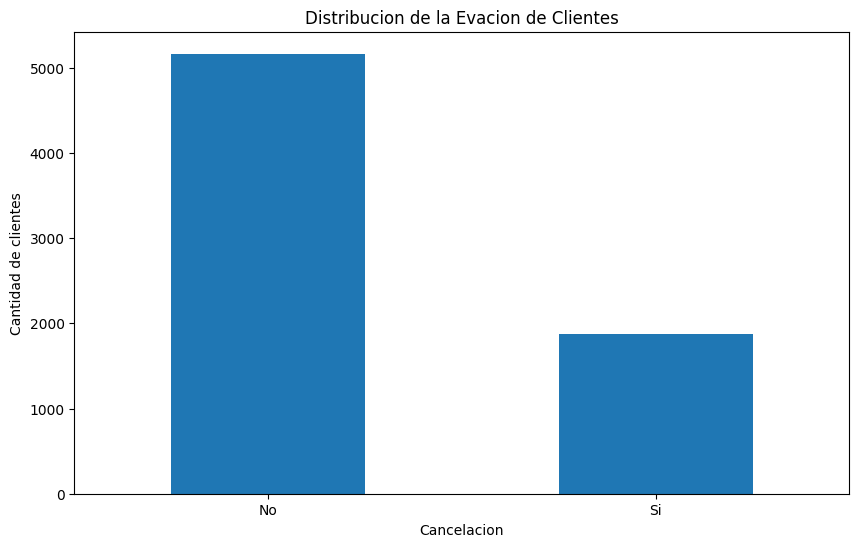

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribucion de la Evacion de Clientes')
plt.xlabel('Cancelacion')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()

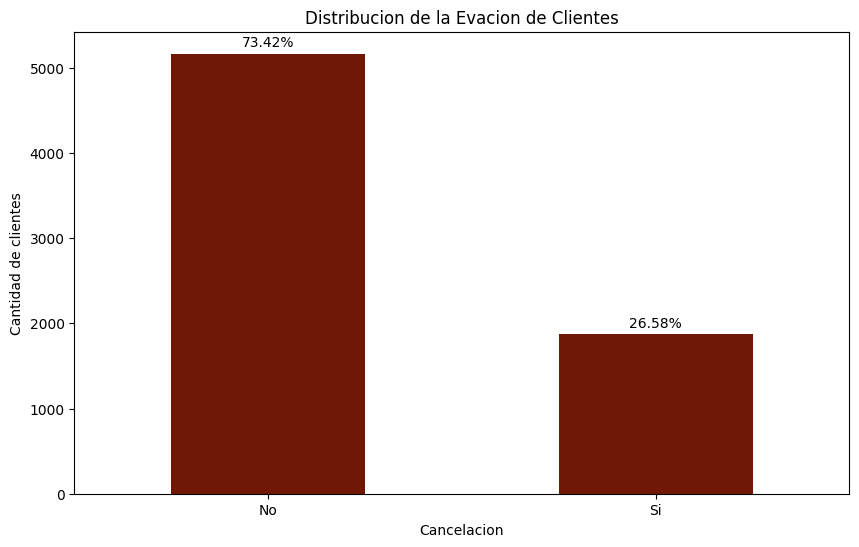

In [79]:
plt.figure(figsize=(10, 6))
conteo_churn = df['Churn'].value_counts()
porcentaje_churn = (conteo_churn / len(df)) * 100

ax = conteo_churn.plot(kind='bar', color='#701705')
plt.title('Distribucion de la Evacion de Clientes (Churn)')
plt.xlabel('Cancelacion')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)

# Agregar porcentajes en la parte superior de cada barra
for i, v in enumerate(porcentaje_churn):
    ax.text(i, conteo_churn.iloc[i] + 50, f'{v:.2f}%', ha='center', va='bottom')

plt.savefig("grafica_churn.jpg", dpi=300, bbox_inches="tight")
plt.show()

In [65]:
import plotly.express as px
import plotly.graph_objects as go


In [88]:
fig = px.histogram(
    df,
    x="Genero",
    color="Churn",
    barmode="group",
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por genero",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Género",
    yaxis_title="Cantidad"
)

fig.show()

In [96]:
fig = px.histogram(
    df,
    x="Tiempo_contrato",
    color="Churn",
    barmode="group",
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por tiempo de contrato",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Tiempo de contrato (meses)",
    yaxis_title="Cantidad"
)

fig.show()



In [95]:
fig = px.histogram(
    df,
    x="tipo_contrato",
    color="Churn",
    barmode="group",
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por tipo de contrato",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Tipo de contrato",
    yaxis_title="Cantidad"
)

fig.show()



In [99]:
fig = px.histogram(
    df,
    x="tipo_contrato",
    color="Churn",
    barmode="group",
    histnorm="percent",          # 👈 convierte a porcentaje
    text_auto=".2f",             # muestra 2 decimales
    color_discrete_map={"No":"#2E86DE", "Si":"#701705"}
)

fig.update_traces(texttemplate="%{y:.2f}%")  # agrega el símbolo %

fig.update_layout(
    title=dict(text="<b>Evación de Clientes (Churn) por tipo de contrato</b>", x=0.5),
    xaxis_title="Tipo de contrato",
    yaxis_title="Porcentaje (%)"
)

fig.show()

In [93]:
fig = px.histogram(
    df,
    x="metodo_pago",
    color="Churn",
    barmode="group",
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por metodo de pago",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Metodo de pago",
    yaxis_title="Cantidad"
)

fig.show()

In [100]:
fig = px.histogram(
    df,
    x="metodo_pago",
    color="Churn",
    barmode="group",
    histnorm="percent",          # 👈 convierte a porcentaje
    text_auto=".2f",             # muestra 2 decimales
    color_discrete_map={"No":"#2E86DE", "Si":"#701705"}
)

fig.update_traces(texttemplate="%{y:.2f}%")  # agrega el símbolo %

fig.update_layout(
    title=dict(text="<b>Evación de Clientes (Churn) por metodo de pago</b>", x=0.5),
    xaxis_title="Metodo de pago",
    yaxis_title="Porcentaje (%)"
)

fig.show()

In [97]:
fig = px.histogram(
    df,
    x="Tipo_internet",
    color="Churn",
    barmode="group",
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por Tipos de internet contratables",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Tipos de Internet",
    yaxis_title="Cantidad"
)

fig.show()



In [101]:
fig = px.histogram(
    df,
    x="Tipo_internet",
    color="Churn",
    barmode="group",
    histnorm="percent",          # 👈 convierte a porcentaje
    text_auto=".2f",             # muestra 2 decimales
    color_discrete_map={"No":"#2E86DE", "Si":"#701705"}
)

fig.update_traces(texttemplate="%{y:.2f}%")  # agrega el símbolo %

fig.update_layout(
    title=dict(text="<b>Evación de Clientes (Churn) por Tipo de internet</b>", x=0.5),
    xaxis_title="Tipo de internet",
    yaxis_title="Porcentaje (%)"
)

fig.show()

In [98]:
fig = px.histogram(
    df,
    x="proteccion_dispositivos",
    color="Churn",
    barmode="group",
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por Proteccion de dispositivos adquirida",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Proteccion de dispositivos adquirida",
    yaxis_title="Cantidad"
)

fig.show()

In [102]:
fig = px.histogram(
    df,
    x="proteccion_dispositivos",
    color="Churn",
    barmode="group",
    histnorm="percent",          # convierte a porcentaje
    text_auto=".2f",             # muestra 2 decimales
    color_discrete_map={"No":"#2E86DE", "Si":"#701705"}
)

fig.update_traces(texttemplate="%{y:.2f}%")  # agrega el símbolo %

fig.update_layout(
    title=dict(text="<b>Evación de Clientes (Churn) por Proteccion de dispositivos adquirida</b>", x=0.5),
    xaxis_title="Proteccion de dispositivos adquirida",
    yaxis_title="Porcentaje (%)"
)

fig.show()

In [103]:
fig = px.histogram(
    df,
    x="soporte_tecnico",
    color="Churn",
    barmode="group",
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por Soporte Tecnico",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Soporte Tecnico",
    yaxis_title="Cantidad"
)

fig.show()

In [104]:
fig = px.histogram(
    df,
    x="soporte_tecnico",
    color="Churn",
    barmode="group",
    histnorm="percent",          # convierte a porcentaje
    text_auto=".2f",             # muestra 2 decimales
    color_discrete_map={"No":"#2E86DE", "Si":"#701705"}
)

fig.update_traces(texttemplate="%{y:.2f}%")  # agrega el símbolo %

fig.update_layout(
    title=dict(text="<b>Evación de Clientes (Churn) por Soporte Tecnico</b>", x=0.5),
    xaxis_title="Soporte tecnico",
    yaxis_title="Porcentaje (%)"
)

fig.show()

In [105]:
fig = px.histogram(
    df,
    x="Tiempo_contrato",
    color="Churn",
    barmode="stack",
    pattern_shape='Tipo_internet',
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por Tiempo de contrato y Tipo de Internet",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Tiempo de contrato",
    yaxis_title="Cantidad"
)

fig.show()

In [106]:
fig = px.histogram(
    df,
    x="Tiempo_contrato",
    color="Churn",
    pattern_shape="Tipo_internet",
    barmode="stack",
    barnorm="percent",          # 👈 cada x suma 100%
    color_discrete_map={"No": "#2E86DE", "Si": "#701705"},
)

fig.update_traces(texttemplate="%{y:.1f}%", textposition="inside")

fig.update_layout(
    title=dict(text="<b>Evación de Clientes (Churn) % por Tiempo de contrato y Tipo de Internet</b>", x=0.5),
    xaxis_title="Tiempo de contrato",
    yaxis_title="Porcentaje (%)"
)

fig.show()

In [107]:
fig = px.histogram(
    df,
    x="Tiempo_contrato",
    color="Churn",
    barmode="stack",
    pattern_shape='metodo_pago',
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por Tiempo de contrato y Metodo de pago",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Tiempo de contrato",
    yaxis_title="Cantidad"
)

fig.show()

In [108]:
fig = px.histogram(
    df,
    x="Tiempo_contrato",
    color="Churn",
    pattern_shape="metodo_pago",
    barmode="stack",
    barnorm="percent",          # 👈 cada x suma 100%
    color_discrete_map={"No": "#2E86DE", "Si": "#701705"},
)

fig.update_traces(texttemplate="%{y:.1f}%", textposition="inside")

fig.update_layout(
    title=dict(text="<b>Evación de Clientes (Churn) % por Tiempo de contrato y Metodo de pago</b>", x=0.5),
    xaxis_title="Tiempo de contrato",
    yaxis_title="Porcentaje (%)"
)

fig.show()

In [75]:
px.histogram(df, x='Total_cobrado', text_auto=True, color='Churn', barmode='group')

Relación entre 'Cuentas_diarias' y 'Churn'

In [76]:
import plotly.express as px

px.box(df, x='Churn', y='Cuentas_diarias', color='Churn', title='Distribución de Cuentas Diarias por Churn')

#📄Informe final

El informe incluye:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.


1. Introduccion. **La empresa Telecom X detecto un problema de evasion de clientes (Churn)** que fue alarmante para ellos, para poder determinar si era significativo para sus cifras se tuvo que realizar una serie de Limpieza, Transformacion y Carga (analisis) de los datos con los que contaban.



2. Limpieza y tratamiento de los datos. El archivo a analizar estaba en formato JSON con diccionarios que contenian la gran mayoria de datos encapsulados, por lo que se tuvo que realizar un **pd.json_normalize(datos)** para que los datos fueran manejables, despues se visualizo si tenia datos nulos y que tipos de datos manejaba cada apartado, despues de una larga limpieza de datos vacios y cambios de object a valores float se obtuvo la siguiente tabla

In [77]:
df

,Id,Churn,Genero,tiene +60,Tiene_pareja,Tiene_dependientes,Tiempo_contrato,servicio_telefono,multiples_lineas,Tipo_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_digital,metodo_pago,Valor_mensual,Total_cobrado,Cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Yes,Cheque,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Si,No,Fibra optica,...,Si,No,No,No,Mensual,Yes,Cheque electronico,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Si,No,13,Si,No,Fibra optica,...,Si,No,Si,Si,Mensual,Yes,Cheque electronico,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Si,No,3,Si,No,Fibra optica,...,No,Si,Si,No,Mensual,Yes,Cheque,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Si,No,DSL,...,No,Si,No,No,Anual,No,Cheque,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,0,Si,No,22,Si,Si,Fibra optica,...,No,No,No,Si,Mensual,Yes,Cheque electronico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Yes,Cheque,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Dos años,No,Cheque,67.85,4627.65,2.261667


3. Análisis Exploratorio de Datos. Al tener ya la tabla limpia para su analisis lo siguiente fue determinar cuales espacios eran de impacto para el churn, por lo que se realizaron diferentes graficas.

Primero se tenia que realizar la grafica que mostrara el procentaje que suponia el Churn (personas que cancelaron su servicio con Telecom X) con personas que mantuvieran su servicio

Con la grafica se determino que si era un porcentaje significativo para la empresa, por lo que se empezo a hacer un analisis mas a profundidad

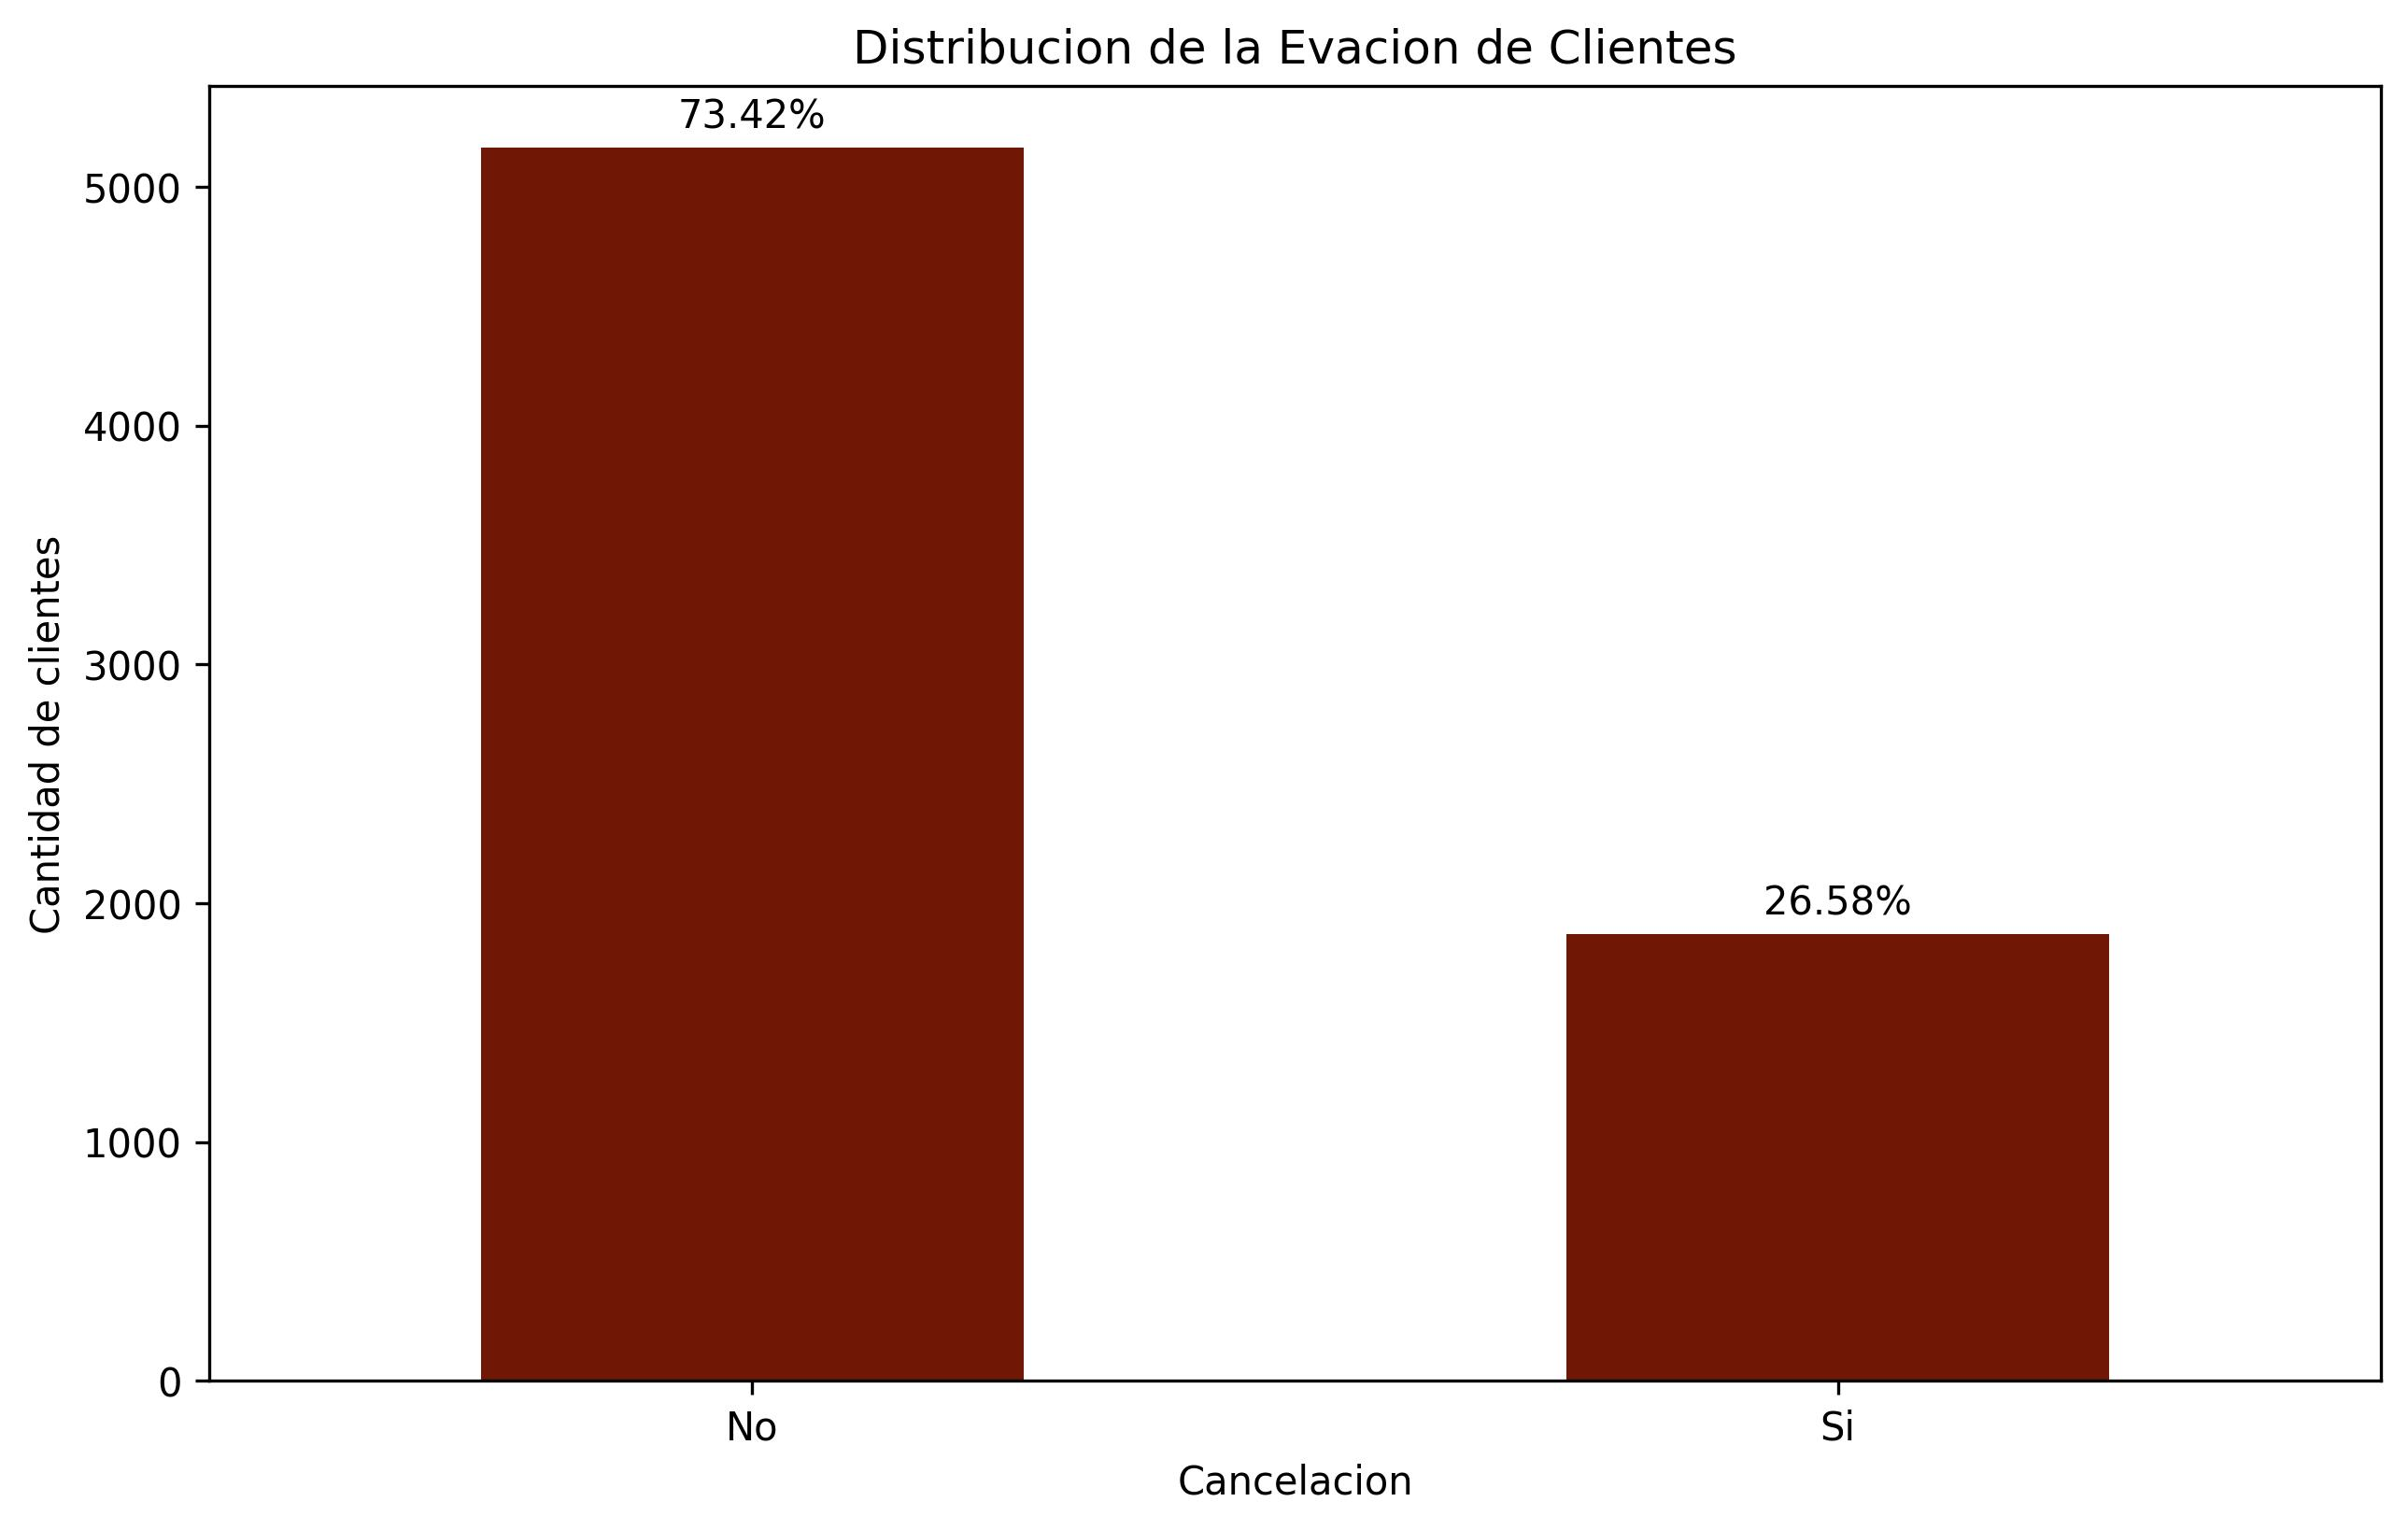

3.1 **Genero vs Churn**
Se realizo el primer grafico para determinar si acaso el genero tenia algun tipo de relacion con el Churn, **los datos arrojados indican que no hay relacion**, ya que es aproximadamente la misma proporcion de hombres y mujeres que cancelaron sus servicios con Telecom X 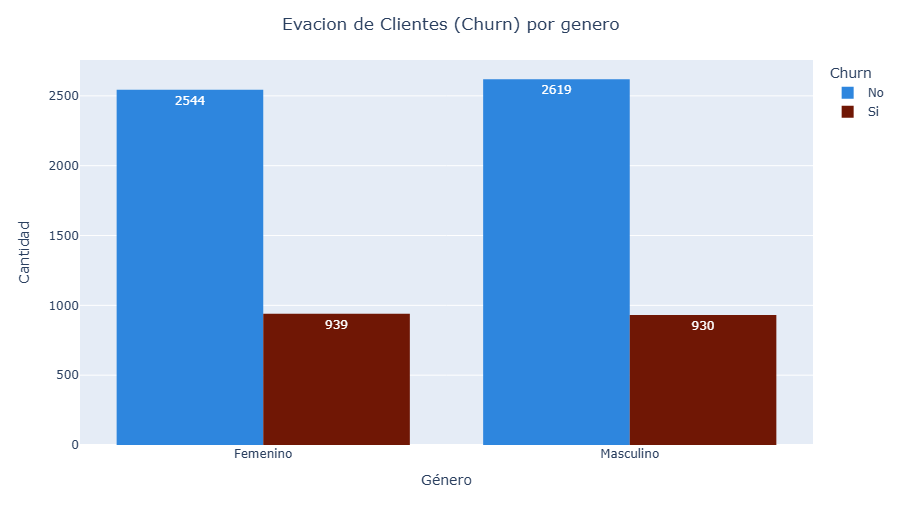

In [89]:
fig = px.histogram(
    df,
    x="Genero",
    color="Churn",
    barmode="group",
    text_auto=True,
    color_discrete_map={   # colores por categoría
        "No": "#2E86DE",
        "Si": "#701705"
    }
)

fig.update_layout(
    title="Evacion de Clientes (Churn) por genero",
    title_x=0.5,          # centra el título (0=izq, 0.5=centro, 1=der)
    xaxis_title="Género",
    yaxis_title="Cantidad"
)

fig.show()

**3.2 Churn vs Datos relevantes.** Despues de analizar el genero y determinar que no era algo relevante para este tema proseguimos con apartados que si mostraron una relacion, los cuales son los siguientes

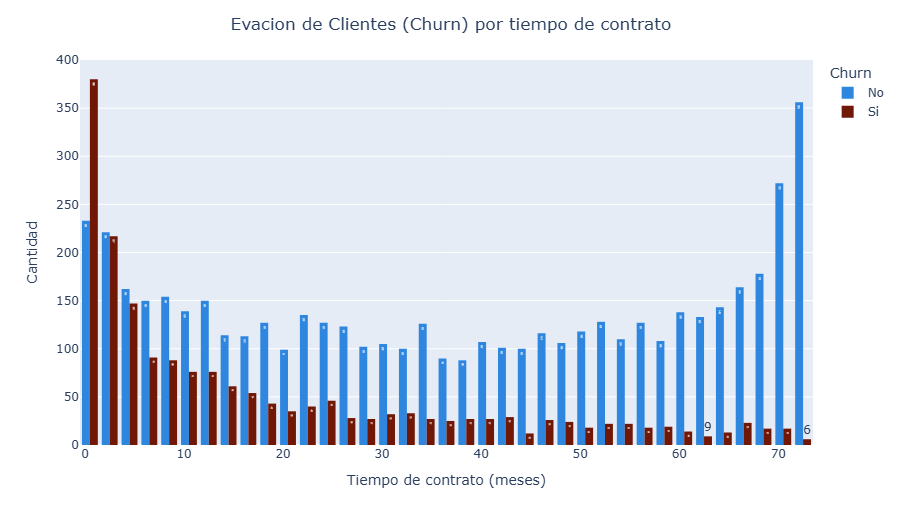

En la grafica se puede distinguir que **el mayor problema se Churn sucede en los primeros meses que se adquiere el contrato**

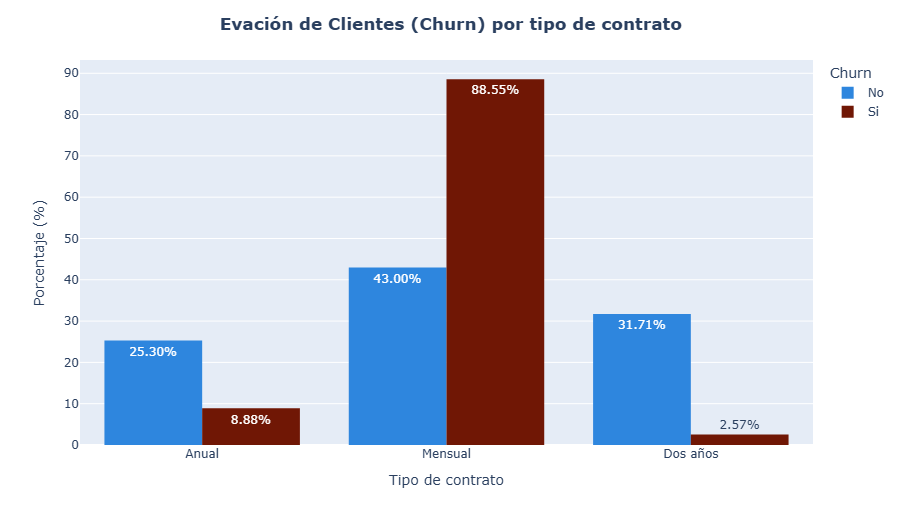

Cuando nos trasladamos al tipo de contrato vemos que el **problema esta en el Tipo de Contrato Mensual**    

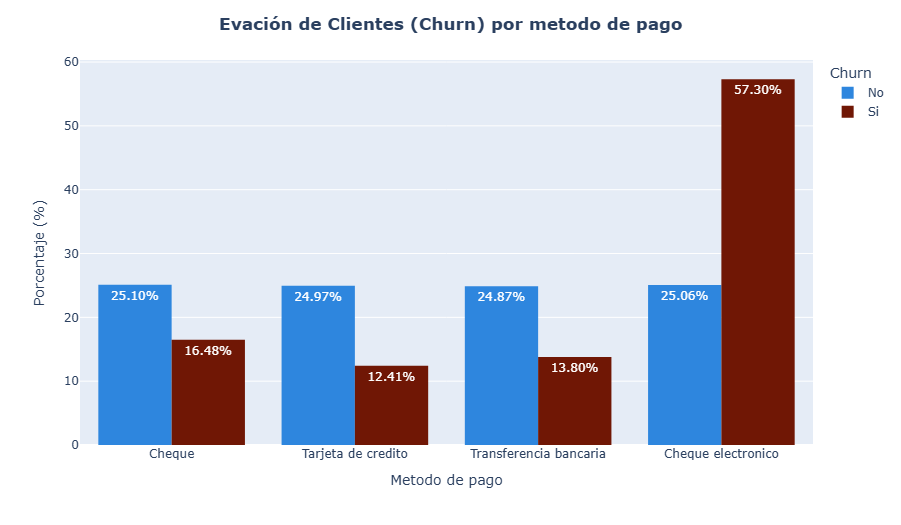

En Metodo de Pago el problema se detecta en **Cheque electronico**

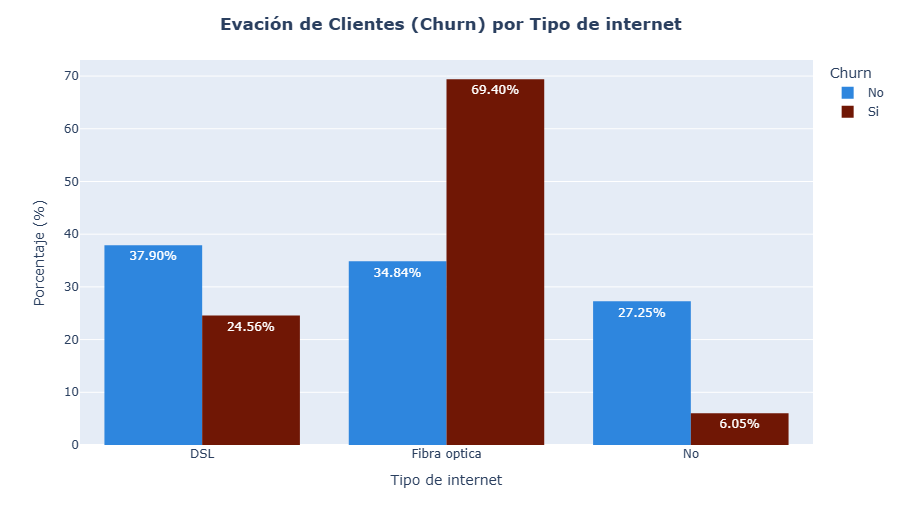

Pasamos al Tipo de Internet y **el problema se detecta en la Fibra Optica**

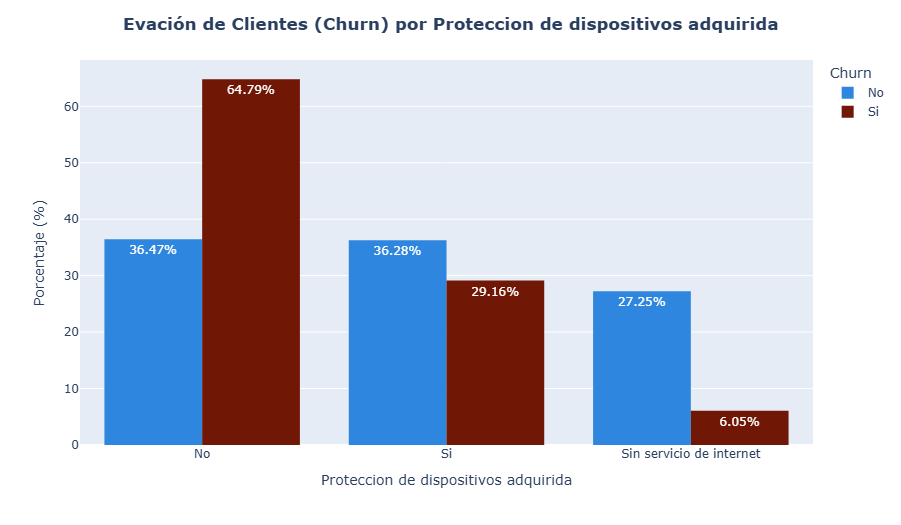

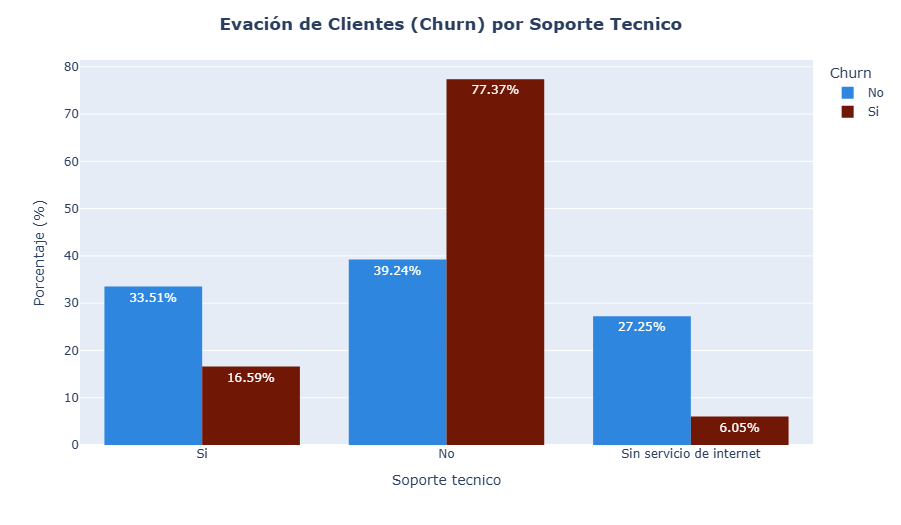

Tambien se detecto algo curioso, **aquellas personas que no habian contratado un servicio extra como soporte tecnico o proteccion tambien tendian a salirse de Telecom X**

4. Conclusiones e Insights

Por ultimo, se quiso realizar por medio de una grafica de porcentaje una comparacion donde teniamos los datos de Churn a traves del tiempo de contrato con las variable de Tipo de internet y tipo de pago, para ver si los datos que arrojaron en sus graficas individuales habian tenido impacto en la escala de tiempo importante (los primeros meses) o si era impactante pero en datos que no importaban (como los ultimos meses) sin embargo se comprobo lo que indicaba en sus graficas individuales, **confirmando asi que el problema esta en los primeros meses del contrato.**

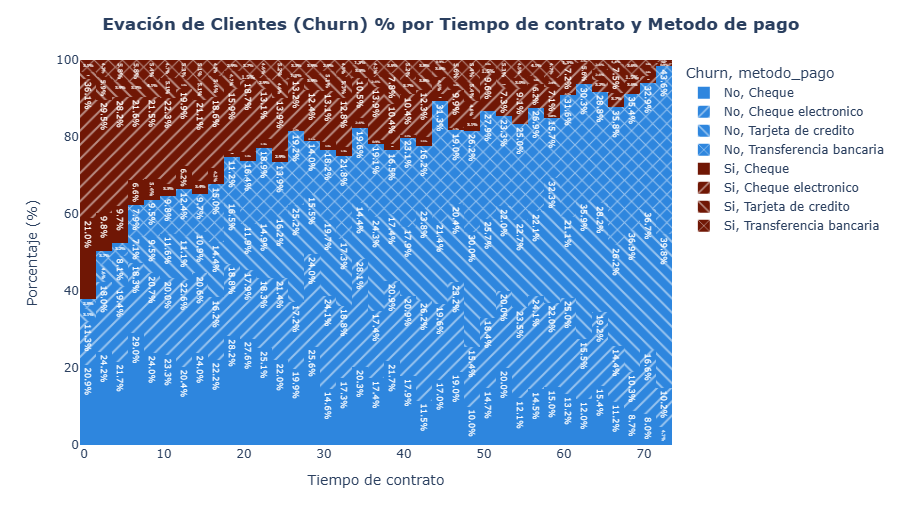

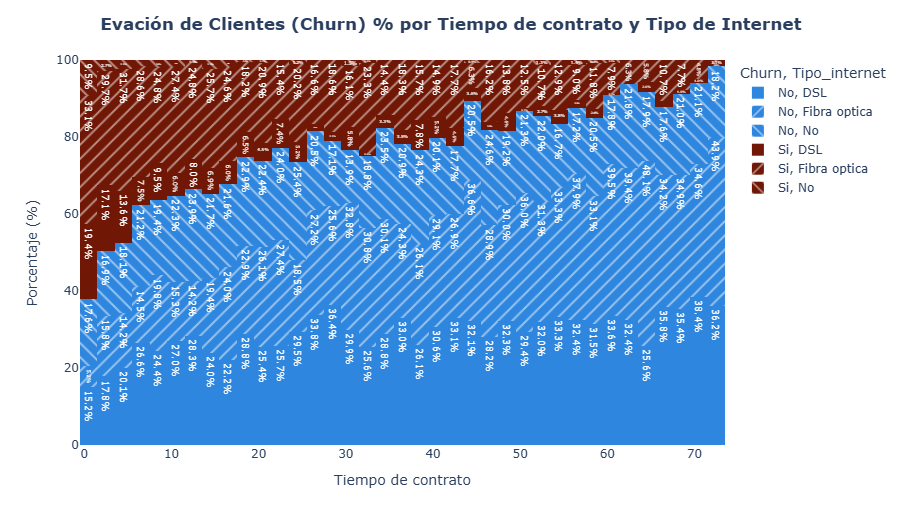

5. Recomendaciones

**Basada en toda la informacion procesada y vista en los graficos, determino que Telecom X deberia aplicar algun tipo de promocion de permanencia en los primeros meses, tal vez incluyendo los servicios de soporte y de proteccion de internet, orientado en otro tipo de pago que no sea cheque electronico, tambien revisar bien el servicio de fibra optica, ya que es uno de los factores que mas afecta su Churn**